<a href="https://colab.research.google.com/github/ahalyasanjiv/ChildhoodLeadExposure/blob/master/Investigating_Correlation_Between_Lead_Exposure_and_Demographics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration for Childhood Lead Exposure

We would like to see the correlation between income and lead exposure. To accomplish this, we will be using two datasets. 

The first dataset is the results for the Childhood Blood Lead Testing and Elevated Incidence by Zip Code provided by the New York State Department of Health. 

The second is the demographics data by zip code in New York, conducted by the US Census Bureau as part of the American Community Survey. We will use this to see what demographics features may be a predictor of elevated incidence of lead found in children.

[Childhood Blood Lead Testing and Elevated Incidence by Zip Code
](https://health.data.ny.gov/Health/Childhood-Blood-Lead-Testing-and-Elevated-Incidenc/d54z-enu8/data
)


[American Community Survey Demographics Data by Zip Code
](https://drive.google.com/file/d/1gjy-lGK-UZpoAjir0N_RvHtnosCTmkW5/view)



First, we will import the necessary libraries and then use pandas to read from both .csv files.

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ahalyasanjiv/ChildhoodLeadExposure/master/data/Childhood_Blood_Lead_Testing_by_Zip_Code.csv')

First, we will see the first few rows of the childhood blood lead testing results by zip code dataset. 

In [3]:
df.head(60)

,County,County Code,Year,Zip,Tests,Less than 5 mcg/dL,5-10 mcg/dL,10 – 15 mcg/dL,15 + mcg/dL,Total Elevated Blood Levels,Percent,"Rate per 1,000",Zip Code Location,County Location
0,Albany,1,2000,11220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40.64057676, -74.01819492)","(42.5882713, -73.9740136)"
1,Albany,1,2001,11220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40.64057676, -74.01819492)","(42.5882713, -73.9740136)"
2,Albany,1,2005,11510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40.65343524, -73.60464708)","(42.5882713, -73.9740136)"
3,Albany,1,2000,11205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40.69660023, -73.96605972)","(42.5882713, -73.9740136)"
4,Albany,1,2009,11206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40.70249424, -73.942524)","(42.5882713, -73.9740136)"
5,Albany,1,2007,11237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40.7033352, -73.91846628)","(42.5882713, -73.9740136)"
6,Albany,1,2006,11211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40.71270969, -73.94984244)","(42.5882713, -73.9740136)"
7,Albany,1,2002,12603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(41.67654093, -73.86002892)","(42.5882713, -73.9740136)"
8,Albany,1,2011,12401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(41.93733645, -74.00525328)","(42.5882713, -73.9740136)"
9,Albany,1,2003,13865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(42.06537045, -75.63670704)","(42.5882713, -73.9740136)"


From the head, it appears that a significant number of rows have missing data points. To get a better sense of how many data points are missing for each column, we will use the info function.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29807 entries, 0 to 29806
Data columns (total 14 columns):
County                          29807 non-null object
County Code                     29807 non-null int64
Year                            29807 non-null int64
Zip                             29807 non-null int64
Tests                           16819 non-null float64
Less than 5 mcg/dL              4512 non-null float64
5-10 mcg/dL                     4533 non-null float64
10 – 15 mcg/dL                  227 non-null float64
15 + mcg/dL                     227 non-null float64
Total Elevated Blood Levels     693 non-null float64
Percent                         5560 non-null float64
Rate per 1,000                  5560 non-null float64
Zip Code Location               29807 non-null object
County Location                 29807 non-null object
dtypes: float64(8), int64(3), object(3)
memory usage: 3.2+ MB


The value in the 'Percent' column refers to the percentage of tested children in the zip code that were identified with confirmed elevated lead blood levels within the specified year.

According to the website, zip codes with less than 6 incidence cases and zip codes with fewer than 30 total tests are nulled to protect patient confidentiality. 

Since the 'Percent' column will be useful in creating a scatter plot later, we do not want to have these null values to skew our graph. We will drop all rows with fewer than 30 total tests, and set the rest of the other null values to 0. 

The reason we are dealing with null values this way is because a low number of test results does not necessarily mean a low number of cases of elevated levels of lead found in blood. Setting the percent to 0 for zip codes where not many tests were conducted may be misleading because it is highly possible that areas with high lead exposure may not be tested as often. However, setting the percent to 0 for zip codes where there are less than 6 incidence cases and the total number of tests is greater than or equal to 30 is more reasonable.



In [0]:
# Drop rows with less than 30 tests
df = df[df['Tests'] < 30]

# Fill rows with NaN in 'Percent' column with 0
df['Percent'].fillna(0, inplace=True)

# Rename Zip to Zip Code
df.rename(columns={'Zip':'Zip Code'}, inplace=True)

Since we are not planning to look at the number of cases overtime, but rather the general lead exposure for each zip code, we will create a new dataframe consisting of just each zip code and its average percentage  of tested children in the zip code that were identified with confirmed elevated lead blood levels.

In [6]:
# Redefine dataframe to consist of each zip code and its percent 
df = df.groupby('Zip Code', as_index=False)['Percent'].mean()
df.info()
lead_df = df 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1207 entries, 0 to 1206
Data columns (total 2 columns):
Zip Code    1207 non-null int64
Percent     1207 non-null float64
dtypes: float64(1), int64(1)
memory usage: 28.3 KB


Now, we want to take a look at the dataset related to demographics in NYS by zip code. Let us look at the head first.

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/ahalyasanjiv/ChildhoodLeadExposure/master/data/Demographic_Data_by_Zip_Code.csv', skiprows=0)
df.head()

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,HC03_MOE_VC01,HC04_EST_VC01,HC04_MOE_VC01,HC01_EST_VC03,HC01_MOE_VC03,HC02_EST_VC03,HC02_MOE_VC03,HC03_EST_VC03,HC03_MOE_VC03,HC04_EST_VC03,HC04_MOE_VC03,HC01_EST_VC04,...,HC03_EST_VC69,HC03_MOE_VC69,HC04_EST_VC69,HC04_MOE_VC69,HC01_EST_VC72,HC01_MOE_VC72,HC02_EST_VC72,HC02_MOE_VC72,HC03_EST_VC72,HC03_MOE_VC72,HC04_EST_VC72,HC04_MOE_VC72,HC01_EST_VC73,HC01_MOE_VC73,HC02_EST_VC73,HC02_MOE_VC73,HC03_EST_VC73,HC03_MOE_VC73,HC04_EST_VC73,HC04_MOE_VC73
0,Id,Id2,Geography,Total; Estimate; Total population,Total; Margin of Error; Total population,Native; born in state of residence; Estimate; ...,Native; born in state of residence; Margin of ...,Native; born in other state in the U.S.; Estim...,Native; born in other state in the U.S.; Margi...,Native; born outside U.S.; Estimate; Total pop...,Native; born outside U.S.; Margin of Error; To...,Total; Estimate; AGE - Under 5 years,Total; Margin of Error; AGE - Under 5 years,Native; born in state of residence; Estimate; ...,Native; born in state of residence; Margin of ...,Native; born in other state in the U.S.; Estim...,Native; born in other state in the U.S.; Margi...,Native; born outside U.S.; Estimate; AGE - Und...,Native; born outside U.S.; Margin of Error; AG...,Total; Estimate; AGE - 5 to 17 years,...,Native; born in other state in the U.S.; Estim...,Native; born in other state in the U.S.; Margi...,Native; born outside U.S.; Estimate; POVERTY S...,Native; born outside U.S.; Margin of Error; PO...,Total; Estimate; PERCENT ALLOCATED - Citizensh...,Total; Margin of Error; PERCENT ALLOCATED - Ci...,Native; born in state of residence; Estimate; ...,Native; born in state of residence; Margin of ...,Native; born in other state in the U.S.; Estim...,Native; born in other state in the U.S.; Margi...,Native; born outside U.S.; Estimate; PERCENT A...,Native; born outside U.S.; Margin of Error; PE...,Total; Estimate; PERCENT ALLOCATED - Place of ...,Total; Margin of Error; PERCENT ALLOCATED - Pl...,Native; born in state of residence; Estimate; ...,Native; born in state of residence; Margin of ...,Native; born in other state in the U.S.; Estim...,Native; born in other state in the U.S.; Margi...,Native; born outside U.S.; Estimate; PERCENT A...,Native; born outside U.S.; Margin of Error; PE...
1,0400000US36,36,New York,19798228,*****,12496444,15757,2312004,11699,499124,6466,5.9,0.1,8.7,0.1,2.3,0.1,2.7,0.2,15.3,...,81.2,0.2,63.4,0.7,7.1,(X),(X),(X),(X),(X),(X),(X),10.7,(X),(X),(X),(X),(X),(X),(X)
2,8600000US06390,06390,ZCTA5 06390,230,139,48,49,176,107,2,3,2.6,5.4,12.5,28.8,0.0,15.6,0.0,100.0,17.8,...,98.9,3.1,100.0,100.0,25.7,(X),(X),(X),(X),(X),(X),(X),26.5,(X),(X),(X),(X),(X),(X),(X)
3,8600000US07421,07421,ZCTA5 07421,7351,509,5142,509,1734,273,25,24,5.1,2.1,5.9,2.7,4.2,3.0,0.0,59.3,15.9,...,91.7,4.3,100.0,59.3,4.5,(X),(X),(X),(X),(X),(X),(X),9.3,(X),(X),(X),(X),(X),(X),(X)
4,8600000US10001,10001,ZCTA5 10001,23947,1738,9252,1408,6693,639,799,226,2.6,0.8,5.8,2.2,1.2,1.2,0.0,3.7,8.7,...,89.4,2.8,64.7,13.7,6.9,(X),(X),(X),(X),(X),(X),(X),10.4,(X),(X),(X),(X),(X),(X),(X)


Since we don't need the top row of the dataframe which consist of feature IDs, we can drop it.

In [8]:
df.columns = df.iloc[0]
df = df.reindex(df.index.drop(0)).reset_index(drop=True)
df.columns.name = None
df.head()

,Id,Id2,Geography,Total; Estimate; Total population,Total; Margin of Error; Total population,Native; born in state of residence; Estimate; Total population,Native; born in state of residence; Margin of Error; Total population,Native; born in other state in the U.S.; Estimate; Total population,Native; born in other state in the U.S.; Margin of Error; Total population,Native; born outside U.S.; Estimate; Total population,Native; born outside U.S.; Margin of Error; Total population,Total; Estimate; AGE - Under 5 years,Total; Margin of Error; AGE - Under 5 years,Native; born in state of residence; Estimate; AGE - Under 5 years,Native; born in state of residence; Margin of Error; AGE - Under 5 years,Native; born in other state in the U.S.; Estimate; AGE - Under 5 years,Native; born in other state in the U.S.; Margin of Error; AGE - Under 5 years,Native; born outside U.S.; Estimate; AGE - Under 5 years,Native; born outside U.S.; Margin of Error; AGE - Under 5 years,Total; Estimate; AGE - 5 to 17 years,...,Native; born in other state in the U.S.; Estimate; POVERTY STATUS IN THE PAST 12 MONTHS - Population for whom poverty status is determined - At or above 150 percent of the poverty level,Native; born in other state in the U.S.; Margin of Error; POVERTY STATUS IN THE PAST 12 MONTHS - Population for whom poverty status is determined - At or above 150 percent of the poverty level,Native; born outside U.S.; Estimate; POVERTY STATUS IN THE PAST 12 MONTHS - Population for whom poverty status is determined - At or above 150 percent of the poverty level,Native; born outside U.S.; Margin of Error; POVERTY STATUS IN THE PAST 12 MONTHS - Population for whom poverty status is determined - At or above 150 percent of the poverty level,Total; Estimate; PERCENT ALLOCATED - Citizenship status,Total; Margin of Error; PERCENT ALLOCATED - Citizenship status,Native; born in state of residence; Estimate; PERCENT ALLOCATED - Citizenship status,Native; born in state of residence; Margin of Error; PERCENT ALLOCATED - Citizenship status,Native; born in other state in the U.S.; Estimate; PERCENT ALLOCATED - Citizenship status,Native; born in other state in the U.S.; Margin of Error; PERCENT ALLOCATED - Citizenship status,Native; born outside U.S.; Estimate; PERCENT ALLOCATED - Citizenship status,Native; born outside U.S.; Margin of Error; PERCENT ALLOCATED - Citizenship status,Total; Estimate; PERCENT ALLOCATED - Place of birth,Total; Margin of Error; PERCENT ALLOCATED - Place of birth,Native; born in state of residence; Estimate; PERCENT ALLOCATED - Place of birth,Native; born in state of residence; Margin of Error; PERCENT ALLOCATED - Place of birth,Native; born in other state in the U.S.; Estimate; PERCENT ALLOCATED - Place of birth,Native; born in other state in the U.S.; Margin of Error; PERCENT ALLOCATED - Place of birth,Native; born outside U.S.; Estimate; PERCENT ALLOCATED - Place of birth,Native; born outside U.S.; Margin of Error; PERCENT ALLOCATED - Place of birth
0,0400000US36,36,New York,19798228,*****,12496444,15757,2312004,11699,499124,6466,5.9,0.1,8.7,0.1,2.3,0.1,2.7,0.2,15.3,...,81.2,0.2,63.4,0.7,7.1,(X),(X),(X),(X),(X),(X),(X),10.7,(X),(X),(X),(X),(X),(X),(X)
1,8600000US06390,06390,ZCTA5 06390,230,139,48,49,176,107,2,3,2.6,5.4,12.5,28.8,0.0,15.6,0.0,100.0,17.8,...,98.9,3.1,100.0,100.0,25.7,(X),(X),(X),(X),(X),(X),(X),26.5,(X),(X),(X),(X),(X),(X),(X)
2,8600000US07421,07421,ZCTA5 07421,7351,509,5142,509,1734,273,25,24,5.1,2.1,5.9,2.7,4.2,3.0,0.0,59.3,15.9,...,91.7,4.3,100.0,59.3,4.5,(X),(X),(X),(X),(X),(X),(X),9.3,(X),(X),(X),(X),(X),(X),(X)
3,8600000US10001,10001,ZCTA5 10001,23947,1738,9252,1408,6693,639,799,226,2.6,0.8,5.8,2.2,1.2,1.2,0.0,3.7,8.7,...,89.4,2.8,64.7,13.7,6.9,(X),(X),(X),(X),(X),(X),(X),10.4,(X),(X),(X),(X),(X),(X),(X)
4,8600000US10002,10002,ZCTA5 10002,77925,2031,30939,1565,8764,742,5325,708,3.6,0.7,8.7,1.6,0.5,0.5,0.9,0.8,10.0,...,81.4,3.3,47.6,7.2,8.3,(X),(X),(X),(X),(X),(X),(X),9.8,(X),(X),(X),(X),(X),(X),(X)


Since 'Id2' refers to zip code, so we can rename that column to fit a name that better corresponds to the other dataset. We can also rename the 'Total; Estimate; Median income (dollars)' column to 'Median Income' to shorten it.

In [0]:
# Rename a few columns to make them cleaner
df.rename(columns={'Id2':'Zip Code','Total; Estimate; Median income (dollars)':'Median Income'}, inplace=True)

In [0]:
# Remove categories a few categories that we will not be looking at 
# For example, the dataset specifies the number of people born in a specific region of the world (e.g. Southeastern Europe), 
# but we will just use racial categories instead
df = df[df.columns.drop(list(df.filter(regex='born|INDIVIDUALS|MARITAL|AGE|age|SEX|Margin|EDUCATIONAL|Geography|Language|ALLOCATED|Id')))]

In [0]:
# Since all the numerical values are total estimates, we can delete that prefix to make the columns easier to read
df.columns = df.columns.str.replace('Total; Estimate; ', '')

# Remove the 'RACE AND HISPANIC OR LATINO ORIGIN - ' prefix in several column names since we know those categpries are referring to race
df.columns = df.columns.str.replace('RACE AND HISPANIC OR LATINO ORIGIN - ', '')

# Likewise, remove the 'POVERTY STATUS IN THE PAST 12 MONTHS - ' prefix
df.columns = df.columns.str.replace('POVERTY STATUS IN THE PAST 12 MONTHS - ', '')

# Drop 'Total Population' and 'One Race' (% of people belonging to a single race)
df.drop(columns=['Total population','One race'], inplace=True)

# We will only look at % of population who are 100% below the property line as opposed to other % brackets
df.drop(columns=['Population for whom poverty status is determined','Population for whom poverty status is determined - 100 to 149 percent of the poverty level', 'Population for whom poverty status is determined - At or above 150 percent of the poverty level'], inplace=True)

# Remove first row since that is for the entire NY and we want to only look at specific zip codes 
df = df[df['Zip Code'] != '36']

Now we have two datasets with rows that can be uniquely identified by the zip code feature. We can use that to join the two. But we first need to investigate/decide how we will deal with null values. In this dataset, there are symbols such as '-' to signal missing data rather than 'NaN', so we will be mindful of that.

In [0]:
# Convert Zip Code column to int64 type to match other datafram
df = df.astype({"Zip Code": int})

In [0]:
# List of rows that we want to convert to float type
float_cols = ['One race - White', 'One race - Black or African American',
       'One race - American Indian and Alaska Native', 'One race - Asian',
       'One race - Native Hawaiian and Other Pacific Islander',
       'One race - Some other race', 'Two or more races',
       'Hispanic or Latino origin (of any race)',
       'White alone, not Hispanic or Latino',
       'Population for whom poverty status is determined - Below 100 percent of the poverty level']

# Function to return if string can be converted to float or not
def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False


In [0]:
# Drop rows if value in col cannot be converted to float, then convert col to float
for col in float_cols:  
  df = df[df[col].apply(lambda x: isfloat(x))]
  df = df.astype({col: float})

In [0]:
# Drop rows if value in median income cannot be converted to int, then convert median income to int
df = df[df['Median Income'].apply(lambda x: x.isnumeric())]
df = df.astype({'Median Income': int})

In [16]:
# Inspect to ensure cleaning produced intended results
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1693 entries, 1 to 1795
Data columns (total 12 columns):
Zip Code                                                                                     1693 non-null int64
One race - White                                                                             1693 non-null float64
One race - Black or African American                                                         1693 non-null float64
One race - American Indian and Alaska Native                                                 1693 non-null float64
One race - Asian                                                                             1693 non-null float64
One race - Native Hawaiian and Other Pacific Islander                                        1693 non-null float64
One race - Some other race                                                                   1693 non-null float64
Two or more races                                                                         

,Zip Code,One race - White,One race - Black or African American,One race - American Indian and Alaska Native,One race - Asian,One race - Native Hawaiian and Other Pacific Islander,One race - Some other race,Two or more races,Hispanic or Latino origin (of any race),"White alone, not Hispanic or Latino",Median Income,Population for whom poverty status is determined - Below 100 percent of the poverty level
1,6390,97.0,0.0,0.0,0.0,0.0,1.3,1.7,1.3,97.0,50703,0.9
2,7421,88.3,1.3,2.3,1.8,0.0,4.9,1.5,6.3,83.8,42021,8.2
3,10001,62.3,11.0,0.2,21.9,0.0,2.4,2.2,14.4,51.6,60412,18.3
4,10002,31.4,7.5,0.7,43.2,0.0,13.7,3.5,27.4,20.8,19311,27.5
5,10003,77.9,4.1,0.2,13.2,0.1,2.2,2.3,7.9,73.0,65568,8.7


Now we should be ready to perform an inner join on the two dataframes on the zip code column.

In [17]:
demographics_df = df

# Join the two dataframes on the zip code column
df = lead_df.set_index('Zip Code').join(demographics_df.set_index('Zip Code'), how='inner')
df.head()

,Percent,One race - White,One race - Black or African American,One race - American Indian and Alaska Native,One race - Asian,One race - Native Hawaiian and Other Pacific Islander,One race - Some other race,Two or more races,Hispanic or Latino origin (of any race),"White alone, not Hispanic or Latino",Median Income,Population for whom poverty status is determined - Below 100 percent of the poverty level
Zip Code,,,,,,,,,,,,
10013,0.0,53.9,4.5,0.1,35.0,0.0,1.9,4.6,6.1,50.5,51907,11.7
10501,0.0,92.3,1.2,0.0,0.4,0.0,3.2,2.9,8.7,87.4,50972,0.6
10502,0.0,75.1,1.6,0.2,16.9,0.0,3.4,2.8,7.7,70.8,71563,2.5
10505,0.0,83.0,2.0,0.0,15.0,0.0,0.0,0.0,9.3,74.5,29286,2.3
10506,0.0,95.1,0.2,0.1,3.5,0.0,0.2,1.0,2.2,93.3,82682,3.4


In [0]:
# After joining, let's rename 'Percent' to 'Percent Elevated Lead Cases'
df.rename(columns={'Percent':'Percent Elevated Lead Cases'}, inplace=True)

Now let's see the correlation correlations between 'Percent Elevated Lead Cases' and the demographic factors.

In [19]:
import matplotlib.pyplot as plt
df.corr()

,Percent Elevated Lead Cases,One race - White,One race - Black or African American,One race - American Indian and Alaska Native,One race - Asian,One race - Native Hawaiian and Other Pacific Islander,One race - Some other race,Two or more races,Hispanic or Latino origin (of any race),"White alone, not Hispanic or Latino",Median Income,Population for whom poverty status is determined - Below 100 percent of the poverty level
Percent Elevated Lead Cases,1.000000,-0.228129,0.282719,-0.005676,0.032635,-0.022942,0.094792,0.188702,0.126239,-0.211089,-0.060596,0.103889
One race - White,-0.228129,1.000000,-0.787795,-0.232386,-0.588970,-0.081289,-0.687622,-0.477410,-0.662877,0.969612,0.026829,-0.188247
One race - Black or African American,0.282719,-0.787795,1.000000,-0.000971,0.137272,0.008701,0.401148,0.318708,0.452926,-0.753204,-0.130242,0.283715
One race - American Indian and Alaska Native,-0.005676,-0.232386,-0.000971,1.000000,0.006591,0.168421,0.013969,0.061743,-0.004415,-0.187312,-0.065270,0.087149
One race - Asian,0.032635,-0.588970,0.137272,0.006591,1.000000,0.020867,0.332757,0.136654,0.314052,-0.570372,0.188193,-0.061363
One race - Native Hawaiian and Other Pacific Islander,-0.022942,-0.081289,0.008701,0.168421,0.020867,1.000000,0.000227,0.103818,0.017983,-0.070291,-0.026736,0.032178
One race - Some other race,0.094792,-0.687622,0.401148,0.013969,0.332757,0.000227,1.000000,0.275411,0.815803,-0.719373,0.003430,0.068390
Two or more races,0.188702,-0.477410,0.318708,0.061743,0.136654,0.103818,0.275411,1.000000,0.333641,-0.461338,-0.086572,0.075416
Hispanic or Latino origin (of any race),0.126239,-0.662877,0.452926,-0.004415,0.314052,0.017983,0.815803,0.333641,1.000000,-0.803090,0.051452,0.067671
"White alone, not Hispanic or Latino",-0.211089,0.969612,-0.753204,-0.187312,-0.570372,-0.070291,-0.719373,-0.461338,-0.803090,1.000000,-0.008110,-0.166915


What we discover from this is that two factors that seem to have a notable positive correlation with incidences of elevated lead found in childhood blood are the percentage of blacks/African-Americans (~0.28), the percentage of people who belong to two or more races (~0.19), the percentage of people of Hispanic/Latino origin (~0.12), and the percentage of people who live below the poverty line (~0.10).

On the other hand, the percentage of white people living in a neighborhood has a negative correlation with the percentage of incidences of elevated lead found in childhood blood tests (~ - 0.23). 

The two factors that appear to stick out are the percentage of residents in a zip code who are black and the percentage of residents in a zip code who are white. 

We can create a scatter plot to see how greatly these two factors contrast in their correlation with lead exposure.





Text(0, 0.5, 'Percentage of Whites')

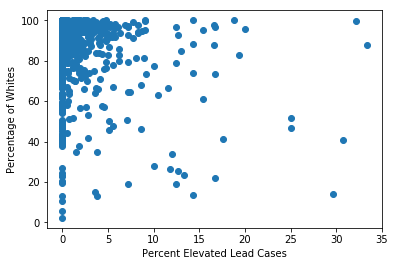

In [22]:
plt.scatter(df['Percent Elevated Lead Cases'],df['One race - White'])
plt.xlabel('Percent Elevated Lead Cases')
plt.ylabel('Percentage of Whites')

Text(0, 0.5, 'Percentage of Blacks or African Americans')

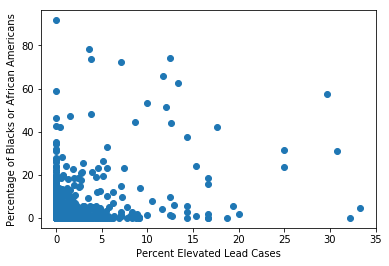

In [23]:
plt.scatter(df['Percent Elevated Lead Cases'],df['One race - Black or African American'])
plt.xlabel('Percent Elevated Lead Cases')
plt.ylabel('Percentage of Blacks or African Americans')